# Project 2: Topic Classification

In this project, you'll work with text data from newsgroup postings on a variety of topics. You'll train classifiers to distinguish between the topics based on the text of the posts. Whereas with digit classification, the input is relatively dense: a 28x28 matrix of pixels, many of which are non-zero, here we'll represent each document with a "bag-of-words" model. As you'll see, this makes the feature representation quite sparse -- only a few words of the total vocabulary are active in any given document. The bag-of-words assumption here is that the label depends only on the words; their order is not important.

The SK-learn documentation on feature extraction will prove useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [148]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

Load the data, stripping out metadata so that we learn classifiers that only use textual features. By default, newsgroups data is split into train and test sets. We further split the test so we have a dev set. Note that we specify 4 categories to use for this project. If you remove the categories argument from the fetch function, you'll get all 20 categories.

In [149]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)

num_test = len(newsgroups_test.target)
test_data, test_labels = newsgroups_test.data[num_test/2:], newsgroups_test.target[num_test/2:]
dev_data, dev_labels = newsgroups_test.data[:num_test/2], newsgroups_test.target[:num_test/2]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print 'training label shape:', train_labels.shape
print 'test label shape:', test_labels.shape
print 'dev label shape:', dev_labels.shape
print 'labels names:', newsgroups_train.target_names

training label shape: (2034,)
test label shape: (677,)
dev label shape: (676,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


(1) For each of the first 5 training examples, print the text of the message along with the label.

In [288]:
def P1(num_examples=5):

### STUDENT START ###

    #Loop through examples X number of times
    for i in range(num_examples):
        print "Example Number:", i+1, "\n"
        print train_data[i], "\n", "Label:", newsgroups_train.target_names[train_labels[i]]
        print "\n", "---------------------------------"

### STUDENT END ###

P1()

Example Number: 1 

Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych 
Label: comp.graphics

---------------------------------
Example Number: 2 



Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating 

(2) Use CountVectorizer to turn the raw training text into feature vectors. You should use the fit_transform function, which makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").

The vectorizer has a lot of options. To get familiar with some of them, write code to answer these questions:

a. The output of the transform (also of fit_transform) is a sparse matrix: http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html. What is the size of the vocabulary? What is the average number of non-zero features per example? What fraction of the entries in the matrix are non-zero? Hint: use "nnz" and "shape" attributes.

b. What are the 0th and last feature strings (in alphabetical order)? Hint: use the vectorizer's get_feature_names function.

c. Specify your own vocabulary with 4 words: ["atheism", "graphics", "space", "religion"]. Confirm the training vectors are appropriately shaped. Now what's the average number of non-zero features per example?

d. Instead of extracting unigram word features, use "analyzer" and "ngram_range" to extract bigram and trigram character features. What size vocabulary does this yield?

e. Use the "min_df" argument to prune words that appear in fewer than 10 documents. What size vocabulary does this yield?

f. Using the standard CountVectorizer, what fraction of the words in the dev data are missing from the vocabulary? Hint: build a vocabulary for both train and dev and look at the size of the difference.

In [289]:
from sklearn.feature_extraction.text import CountVectorizer

def P2():

### STUDENT START ###

    print "-----Part A-----"
    count_vect = CountVectorizer()
    X_train_counts = count_vect.fit_transform(train_data)
    print "Shape of the matrix:", X_train_counts.shape, "where the size of vocabulary is:", len(count_vect.vocabulary_) #displays number of rows and features, respectively
    print "Average number of non-zero features per example:", float(X_train_counts.nnz)/float(X_train_counts.shape[0])
    print "Fraction of entries that are non-zero:", "{0:.3f}%".format((float(X_train_counts.nnz)/(float(X_train_counts.shape[0])*float(X_train_counts.shape[1]))))
    print "\n"
    
    print "-----Part B-----"
    print "First feature:", count_vect.get_feature_names()[0]
    print "Last feature:", count_vect.get_feature_names()[-1]
    print "\n"

    print "-----Part C-----"
    my_vocabulary = ["atheism", "graphics", "space", "religion"]
    my_count_vect = CountVectorizer(vocabulary = my_vocabulary)
    my_train_counts = my_count_vect.fit_transform(train_data)
    print "Shape of the matrix:", my_train_counts.shape, "where the size of vocabulary is:", len(my_count_vect.vocabulary_)
    print "Fraction of entries that are non-zero:", "{0:.3f}%".format((float(my_train_counts.nnz)/float(my_train_counts.shape[0])))
    print "\n"

    print "-----Part D-----"
    bigram_vect = CountVectorizer(analyzer = "char", ngram_range=(2,2))
    bigram_train_counts = bigram_vect.fit_transform(train_data)
    print "Shape of the bigram matrix:", bigram_train_counts.shape, "where the size of vocabulary is:", len(bigram_vect.vocabulary_)

    trigram_vect = CountVectorizer(analyzer = "char", ngram_range=(3,3))
    trigram_train_counts = trigram_vect.fit_transform(train_data)
    print "Shape of the trigram matrix:", trigram_train_counts.shape, "where the size of vocabulary is:", len(trigram_vect.vocabulary_)
    print "\n"

    print "-----Part E-----"
    min_vect = CountVectorizer(min_df = 10)
    min_vect_counts = min_vect.fit_transform(train_data)
    print "Shape of the matrix for words in 10+ docs:", min_vect_counts.shape, "where the size of vocabulary is:", len(min_vect.vocabulary_)
    print "\n"

    print "-----Part F-----"
    count_vect = CountVectorizer()
    X_train_counts = count_vect.fit_transform(train_data)
    X_dev_counts = count_vect.fit_transform(dev_data)
    print "The fraction of words in dev data that are missing from training data: %.3f%%" % ((1 - float(X_dev_counts.shape[1])/float(X_train_counts.shape[1]))* 100)
    
    ### STUDENT END ###
P2()

-----Part A-----
Shape of the matrix: (2034, 26879) where the size of vocabulary is: 26879
Average number of non-zero features per example: 96.7059980334
Fraction of entries that are non-zero: 0.004%


-----Part B-----
First feature: 00
Last feature: zyxel


-----Part C-----
Shape of the matrix: (2034, 4) where the size of vocabulary is: 4
Fraction of entries that are non-zero: 0.268%


-----Part D-----
Shape of the bigram matrix: (2034, 3291) where the size of vocabulary is: 3291
Shape of the trigram matrix: (2034, 32187) where the size of vocabulary is: 32187


-----Part E-----
Shape of the matrix for words in 10+ docs: (2034, 3064) where the size of vocabulary is: 3064


-----Part F-----
The fraction of words in dev data that are missing from training data: 39.559%


(3) Use the default CountVectorizer options and report the f1 score (use metrics.f1_score) for a k nearest neighbors classifier; find the optimal value for k. Also fit a Multinomial Naive Bayes model and find the optimal value for alpha. Finally, fit a logistic regression model and find the optimal value for the regularization strength C using l2 regularization. A few questions:

a. Why doesn't nearest neighbors work well for this problem?

b. Any ideas why logistic regression doesn't work as well as Naive Bayes?

c. Logistic regression estimates a weight vector for each class, which you can access with the coef\_ attribute. Output the sum of the squared weight values for each class for each setting of the C parameter. Briefly explain the relationship between the sum and the value of C.

ANSWER: Code below.

A) The KNN approach has a risk of being overfit to the model. Given the nuances surrounding english words, there could be a dramatic categorical difference between similar words.

B) The key distinction here is that MNB assumes independence between features whereas Logistic Regression attempts to connect the features via a line. Inherently, this will generally reduce accuracy.

C) The C value is the inverse of the regularization strength (smaller figures imply stronger regularization). In this case, as C increases, the accuracy of the output decreases as does the sum of the squared weight values.

In [388]:
def P3():
    
### STUDENT START ###

    #Create vector and transform data prior to analysis
    find_vector = CountVectorizer()
    train3_data = find_vector.fit_transform(train_data)
    dev3_data = find_vector.transform(dev_data)
    
    #k Nearest Neighbor Classifier
    print "------------kNN------------"
    k = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10]}
    knn_search = GridSearchCV(KNeighborsClassifier(), k, scoring = 'f1_weighted')
    knn_search.fit(train3_data, train_labels)
    print "Optimal k in this range is: ", knn_search.best_params_, "with accuracy", "{0:.2f}%".format(knn_search.best_score_*100)
    
    #Multinomial Naive Bayes Model
    print "\n"
    print "------------MNB------------"
    alpha = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}
    mnb_search = GridSearchCV(MultinomialNB(), alpha, scoring = 'f1_weighted')
    mnb_search.fit(train3_data, train_labels)
    print "Optimal alpha in this rnage is: ", mnb_search.best_params_, "with accuracy", "{0:.2f}%".format(mnb_search.best_score_*100)
    
    #Logistic Regression
    print "\n"
    print "-----Logistic Regression-----"
    C = {'C': np.arange(0.125, 0.875, 0.125)}
    lr_search = GridSearchCV(LogisticRegression(penalty = 'l2'), C, scoring = 'f1_weighted')
    lr_search.fit(train3_data, train_labels)
    print "Optimal C in this range is: ", lr_search.best_params_, "with accuracy", "{0:.2f}%".format(lr_search.best_score_*100)
    print "\n"
    
    #Loop through C Values
    for i in C['C']:
        lr_search_train = LogisticRegression(C = i, penalty = 'l2')
        lr_search_train.fit(train3_data, train_labels)
        lr_search_dev = lr_search_train.predict(dev3_data)
        print "C value of: ", i, "results in accuracy of ", "{0:.2f}%".format(metrics.f1_score(dev_labels, lr_search_dev, average = 'weighted')*100)
        print np.sum(lr_search_train.coef_**2, axis = 1)
    
### STUDENT END ###

P3()

------------kNN------------
Optimal k in this range is:  {'n_neighbors': 10} with accuracy 41.28%


------------MNB------------
Optimal alpha in this rnage is:  {'alpha': 0.01} with accuracy 82.87%


-----Logistic Regression-----
Optimal C in this range is:  {'C': 0.25} with accuracy 76.79%


C value of:  0.125 results in accuracy of  70.75%
[ 33.15475517  29.56599677  33.33090472  28.24082041]
C value of:  0.25 results in accuracy of  70.81%
[ 59.82404839  50.56849034  58.94251273  51.46260437]
C value of:  0.375 results in accuracy of  70.54%
[ 82.53570562  67.95915652  80.36320633  71.35913552]
C value of:  0.5 results in accuracy of  70.85%
[ 102.59648447   83.11964951   99.0380729    89.00896845]
C value of:  0.625 results in accuracy of  70.01%
[ 120.72293555   96.61357075  115.71644774  104.92431473]
C value of:  0.75 results in accuracy of  69.26%
[ 137.32636174  108.95602661  130.91894507  119.54720402]


(4) Train a logistic regression model. Find the 5 features with the largest weights for each label -- 20 features in total. Create a table with 20 rows and 4 columns that shows the weight for each of these features for each of the labels. Create the table again with bigram features. Any surprising features in this table?

In [295]:
import pandas as pd

def P4():

### STUDENT START ###

    find_vector = CountVectorizer()
    train4_data = find_vector.fit_transform(train_data)
    dev4_data = find_vector.transform(dev_data)
    
    #create array of feature names (http://scikit-learn.org/stable/datasets/)
    feature_names = np.array(find_vector.get_feature_names())
    
    #leverage our logistic regressoin from question 3
    lr_search = LogisticRegression(C = 0.25, penalty = 'l2')
    lr_search.fit(train4_data, train_labels)
    
    #leverage numpy's argpartition functionality to identify position of desired words
    top_index = np.argpartition(lr_search.coef_, kth = -5, axis = 1)[:,-5:].flatten()
    #identify word at that specific index
    top_features = feature_names[top_index]

    #create table
    table_summary = np.zeros((len(top_features),len(newsgroups_train.target_names)))
    for i in range(0, len(newsgroups_train.target_names)):
        feature_weights = lr_search.coef_[i, top_index]
        table_summary[:,i] = feature_weights
    #print table_summary
    
    #establish dataframe to present data
    columns = newsgroups_train.target_names
    index = top_features
    df = pd.DataFrame(data = table_summary, index = index, columns = columns)
    print "Default Logistic Regression based on Unigram Features: \n"
    print df

    find_vector_bigram = CountVectorizer(ngram_range = (2,2))
    train4_data = find_vector_bigram.fit_transform(train_data)
    print "\n...now with bigram features: \n"

    #create array of feature names (http://scikit-learn.org/stable/datasets/)
    feature_names = np.array(find_vector_bigram.get_feature_names())
    
    #leverage our logistic regression from question 3
    lr_search = LogisticRegression(C = 0.25, penalty = 'l2')
    lr_search.fit(train4_data, train_labels)
    
    #leverage numpy's argpartition functionality to identify position of desired words
    top_index = np.argpartition(lr_search.coef_, kth = -5, axis = 1)[:,-5:].flatten()
    #identify word at that specific index
    top_features = feature_names[top_index]

    table_summary = np.zeros((len(top_features),len(newsgroups_train.target_names)))
    for i in range(0, len(newsgroups_train.target_names)):
        feature_weights = lr_search.coef_[i, top_index]
        table_summary[:,i] = feature_weights
    #print table_summary
    
    columns = newsgroups_train.target_names
    index = top_features
    df2 = pd.DataFrame(data = table_summary, index = index, columns = columns)
    print df2

### STUDENT END ###

P4()

Default Logistic Regression based on Unigram Features: 

            alt.atheism  comp.graphics  sci.space  talk.religion.misc
islam          0.562665      -0.096431  -0.229768           -0.232145
religion       0.657447      -0.410246  -0.536849           -0.027691
atheists       0.658208      -0.088837  -0.217741           -0.468151
bobby          0.667341      -0.160828  -0.232982           -0.315151
atheism        0.657605      -0.287891  -0.289819           -0.327136
computer       0.011038       0.718535  -0.460615           -0.316932
file          -0.227305       0.866508  -0.565020           -0.402706
3d            -0.248999       0.765284  -0.450569           -0.256829
image         -0.370630       0.899335  -0.530294           -0.302952
graphics      -0.534886       1.341092  -0.891945           -0.506406
spacecraft    -0.241185      -0.257990   0.572717           -0.217091
launch        -0.297387      -0.329488   0.643378           -0.230075
nasa          -0.372810      -0.3

ANSWER: I was not surprised to generally lower correlations in the bigram output as many of these words occur frequently as 'fillers' in the english language whereas the unigram table focused on specific nouns (e.g. Computer, Spacecraft, NASA, etc) which are more prevalant when speaking of a specific category.

(5) Try to improve the logistic regression classifier by passing a custom preprocessor to CountVectorizer. The preprocessing function runs on the raw text, before it is split into words by the tokenizer. Your preprocessor should try to normalize the input in various ways to improve generalization. For example, try lowercasing everything, replacing sequences of numbers with a single token, removing various other non-letter characters, and shortening long words. If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular. With your new preprocessor, how much did you reduce the size of the dictionary?

For reference, I was able to improve dev F1 by 2 points.

In [386]:
from nltk.tokenize import RegexpTokenizer
### STUDENT START ###

def empty_preprocessor(s):
    return s

def better_preprocessor(s):
    s = s.lower() #make sure all letters are lowercase
    s = re.sub(r'\b\w{1,3}\b','',s) #remove words with length less than 4
    s = re.sub(r'\b[0-9]+[.,]+[""]+[<>_]\b', '', s) #remove specific punctuation
    return s

### STUDENT END ###


def P5():

### STUDENT START ###
    a = 0
    def run_through(find_vector):
        
        #set the stage
        train5_data = find_vector.fit_transform(train_data)
        dev5_data = find_vector.transform(dev_data)
        print "Size: ", train5_data.shape[1]
        
        #establish the regresson using the best C value from earlier in homework
        train_log = LogisticRegression(C = 0.25, penalty = 'l2')
        train_log.fit(train5_data, train_labels)
        dev_log = train_log.predict(dev5_data)
        print "Accuracy: ", "{0:.2f}%".format(metrics.f1_score(dev_labels, dev_log, average = 'weighted')*100)
    
    
    #run pre-processing function
    print "Empty Pre Processing"
    find_vector = CountVectorizer(preprocessor=empty_preprocessor)
    run_through(find_vector)
    
    #run better preprocessing function
    print "\n"
    print "Better Pre Processor"
    find_vector = CountVectorizer(preprocessor=better_preprocessor)
    run_through(find_vector)
    
    #compare deltas
    print "\n"
    print "Improvement from Better Preprocessor is: ", (0.717352778266 - 0.704429099008)
    print "With a dictionary size reduction of: ", 33291 - 24026, "words"
    
### STUDENT END ###

P5()

Empty Pre Processing
Size:  33291
Accuracy:  70.44%


Better Pre Processor
Size:  24026
Accuracy:  71.74%


Improvement from Better Preprocessor is:  0.012923679258
With a dictionary size reduction of:  9265 words


(6) The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. That is, logistic regression seeks the set of weights that minimizes errors in the training data AND has a small size. The default regularization, L2, computes this size as the sum of the squared weights (see P3, above). L1 regularization computes this size as the sum of the absolute values of the weights. The result is that whereas L2 regularization makes all the weights relatively small, L1 regularization drives lots of the weights to 0, effectively removing unimportant features.

Train a logistic regression model using a "l1" penalty. Output the number of learned weights that are not equal to zero. How does this compare to the number of non-zero weights you get with "l2"? Now, reduce the size of the vocabulary by keeping only those features that have at least one non-zero weight and retrain a model using "l2".

Make a plot showing accuracy of the re-trained model vs. the vocabulary size you get when pruning unused features by adjusting the C parameter.

Note: The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.01 (the default is .0001).

Initial L1 Accuracy: 69.92% 

Initial L2 Accuracy: 70.38% 

Number of learned weights (non-zero) for L1:  760
Number of learned weights (non-zero) for L2:  107516 

Post Reduction L2 Accuracy: 69.27% 



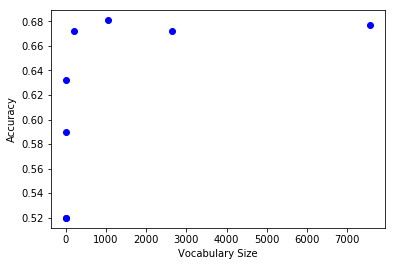

In [385]:
def P6():

    # Keep this random seed here to make comparison easier.
    np.random.seed(0)

    ### STUDENT START ###
    
    find_vector6 = CountVectorizer()
    train6_data = find_vector6.fit_transform(train_data)
    dev6_data = find_vector6.transform(dev_data)      

    #Train Models with
    lr_l1 = LogisticRegression(penalty = 'l1', tol = 0.01, C = 0.25)
    lr_l1 = lr_l1.fit(train6_data, train_labels)
    lr_l1_predict = lr_l1.predict(dev6_data)
    print "Initial L1 Accuracy:", "{0:.2f}%".format(metrics.f1_score(dev_labels, lr_l1_predict, average = 'weighted')*100), "\n"
    
    lr_l2 = LogisticRegression(penalty = 'l2', tol = 0.01, C = 0.25)
    lr_l2 = lr_l2.fit(train6_data, train_labels)
    lr_l2_predict = lr_l2.predict(dev6_data)
    print "Initial L2 Accuracy:", "{0:.2f}%".format(metrics.f1_score(dev_labels, lr_l2_predict, average = 'weighted')*100), "\n"
    
    #
    print "Number of learned weights (non-zero) for L1: ", np.count_nonzero(lr_l1.coef_)
    print "Number of learned weights (non-zero) for L2: ", np.count_nonzero(lr_l2.coef_), "\n"

    #Reduce size of vocabulary by keeping only those features w/ >=1 non-zero weight. Retrain with L2
    
    #Setting the stage - checking for non-zeros across columns
    nonzeros = np.nonzero(np.sum(lr_l1.coef_, axis = 0))
    train6_dataZ = train6_data[:, nonzeros[0]]
    dev6_dataZ = dev6_data[:, nonzeros[0]]
    
    #test data against reduced data set - accuracy drops, but not as much as i expected
    lr_l2Z = LogisticRegression(penalty = 'l2', tol = 0.01, C = 0.25)
    lr_l2Z = lr_l2.fit(train6_dataZ, train_labels)
    lr_l2Z_predict = lr_l2Z.predict(dev6_dataZ)
    print "Post Reduction L2 Accuracy:", "{0:.2f}%".format(metrics.f1_score(dev_labels, lr_l2Z_predict, average = 'weighted')*100), "\n"

    #Now iterate across multiple C values
    c_array = [0.0001, 0.0001, 0.001, 0.01, .1, 1, 10, 100]
    accuracy, voc_size = ([] for i in range(2))
    
    for i in c_array:
        
        lr_l1 = LogisticRegression(penalty = 'l1', tol = 0.01, C = i)
        lr_l1 = lr_l1.fit(train6_data, train_labels)
        lr_l1_predict = lr_l1.predict(dev6_data)
        
        lr_l2 = LogisticRegression(penalty = 'l2', tol = 0.01, C = i)
        lr_l2 = lr_l2.fit(train6_dataZ, train_labels)
        predict_dev = lr_l2.predict(dev6_dataZ)
        
        voc_size.append(np.count_nonzero(np.sum(lr_l1.coef_, axis = 0)))
        accuracy.append(metrics.f1_score(dev_labels, predict_dev, average = 'weighted'))
    
    plt.plot(voc_size, accuracy, 'bo')
    plt.ylabel("Accuracy")
    plt.xlabel("Vocabulary Size")
        
    #Plot the accuracy of the re-trained model vs the vocabulary size
    
    ### STUDENT END ###
    
P6()

(7) Use the TfidfVectorizer -- how is this different from the CountVectorizer? Train a logistic regression model with C=100.

Make predictions on the dev data and show the top 3 documents where the ratio R is largest, where R is:

maximum predicted probability / predicted probability of the correct label

What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

In [383]:
def P7():

### STUDENT START ###

    #setting the stage
    tfid_vector7 = TfidfVectorizer()
    train7_data = tfid_vector7.fit_transform(train_data)
    dev7_data = tfid_vector7.transform(dev_data)
    
    #mek predictions on dev data
    lr_7 = LogisticRegression(C = 100)
    lr_7 = lr_7.fit(train7_data, train_labels)
    predict_7 = lr_7.predict(dev7_data)
    print "Prediction score is: ", "{0:.2f}%".format(metrics.f1_score(dev_labels, predict_7, average = 'weighted')*100), "\n"
    
    #set R equal to max predicted probability / predicted probability of the correct label
    R = np.zeros(len(predict_7))
    for i in range(len(R)):
        predicted_probability = lr_7.predict_proba(dev7_data)[i]
        R[i] = np.max(predicted_probability) / predicted_probability[dev_labels[i]]
    
    #show top 3 documents based on calculated r values
    sort_r = np.argsort(R)[-3:]
    y = 1
    for i in sort_r:
        print "Rank ", y, "\n", dev_data[i], "\n"
        print "Predicted label: ", newsgroups_train.target_names[predict_7[i]], " vs reality of", newsgroups_train.target_names[dev_labels[i]]
        print "-----------------------------------", "\n"
        y += 1
    
## STUDENT END ###

P7()

Prediction score is:  75.98% 

Rank  1 

The 24 children were, of course, killed by a lone gunman in a second story
window, who fired eight bullets in the space of two seconds...


Predicted label:  talk.religion.misc  vs reality of alt.atheism
----------------------------------- 

Rank  2 
Can anyone provide me a ftp site where I can obtain a online version
of the Book of Mormon. Please email the internet address if possible. 

Predicted label:  comp.graphics  vs reality of talk.religion.misc
----------------------------------- 

Rank  3 
I am pleased to announce that a *revised version* of _The Easy-to-Read Book
of Mormon_ (former title: _Mormon's Book_) by Lynn Matthews Anderson is now
available through anonymous ftp (see information below). In addition to the
change in title, the revised ETR BOM has been shortened by several pages
(eliminating many extraneous "that's" and "of's"), and many (minor) errors
have been corrected. This release includes a simplified Joseph Smith Story,
te

ANSWER: tfidvectorizer normalizes its results so each vector in its output as norm = 1. this is simply a countervecotrizer followed by a tfidtransformer function. The problem here is we are now misclassifying text based on the occurrance of less commonly weighted words being weighted more heavily - explaining why 'email' and 'ASCII' may be the driving determinants in classifying the last two outputs from the above problem. Reducing the weight of less common words may help with our accuracy - or potentially weighing proper nouns more heavily?

(8) EXTRA CREDIT

Try implementing one of your ideas based on your error analysis. Use logistic regression as your underlying model.